1. Filter the data to include only weekdays (Monday to Friday) and plot a line graph showing the pedestrian counts for each day of the week.

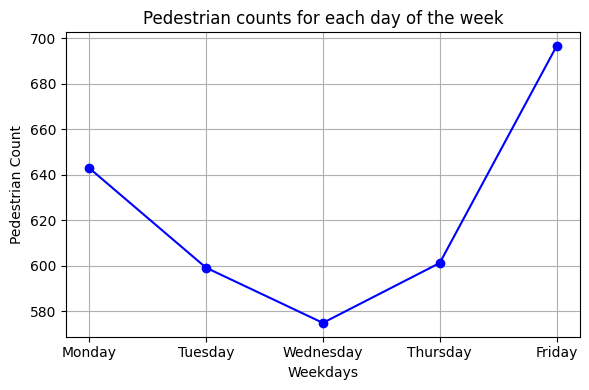

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset
url = "https://data.cityofnewyork.us/api/views/6fi9-q3ta/rows.csv?accessType=DOWNLOAD"
df = pd.read_csv(url)

# Filter the data
df['hour_beginning'] = pd.to_datetime(df['hour_beginning'], format='%m/%d/%Y %I:%M:%S %p')
df_weekdays = df[df['hour_beginning'].dt.dayofweek < 5].copy()

# Aggregate the data by weekdays
df_weekdays['day_name'] = df_weekdays['hour_beginning'].dt.day_name()
df_grouped = df_weekdays.groupby('day_name')['Pedestrians'].mean()

# Reorder the data
order = ['Monday', 'Tuesday', 'Wednesday','Thursday', 'Friday']
df_grouped = df_grouped.reindex(order)

# Plotting a line plot of pedestrian counts for each day of the week
plt.figure(figsize=(6, 4))
plt.plot(df_grouped.index, df_grouped.values, marker = 'o', color='blue')
plt.title('Pedestrian counts for each day of the week')
plt.xlabel('Weekdays')
plt.ylabel('Pedestrian Count')
plt.grid(True)
plt.tight_layout()
plt.show()

2. Track pedestrian counts on the Brooklyn Bridge for the year 2019 and analyze how different weather conditions influence pedestrian activity in that year. Sort the pedestrian count data by weather summary to identify any correlations( with a correlation matrix) between weather patterns and pedestrian counts for the selected year.

C:\Users\yyz\AppData\Local\Temp\ipykernel_13084\3502590611.py:7: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_2019['weather_summary'] = df_2019['weather_summary'].fillna(method="ffill")


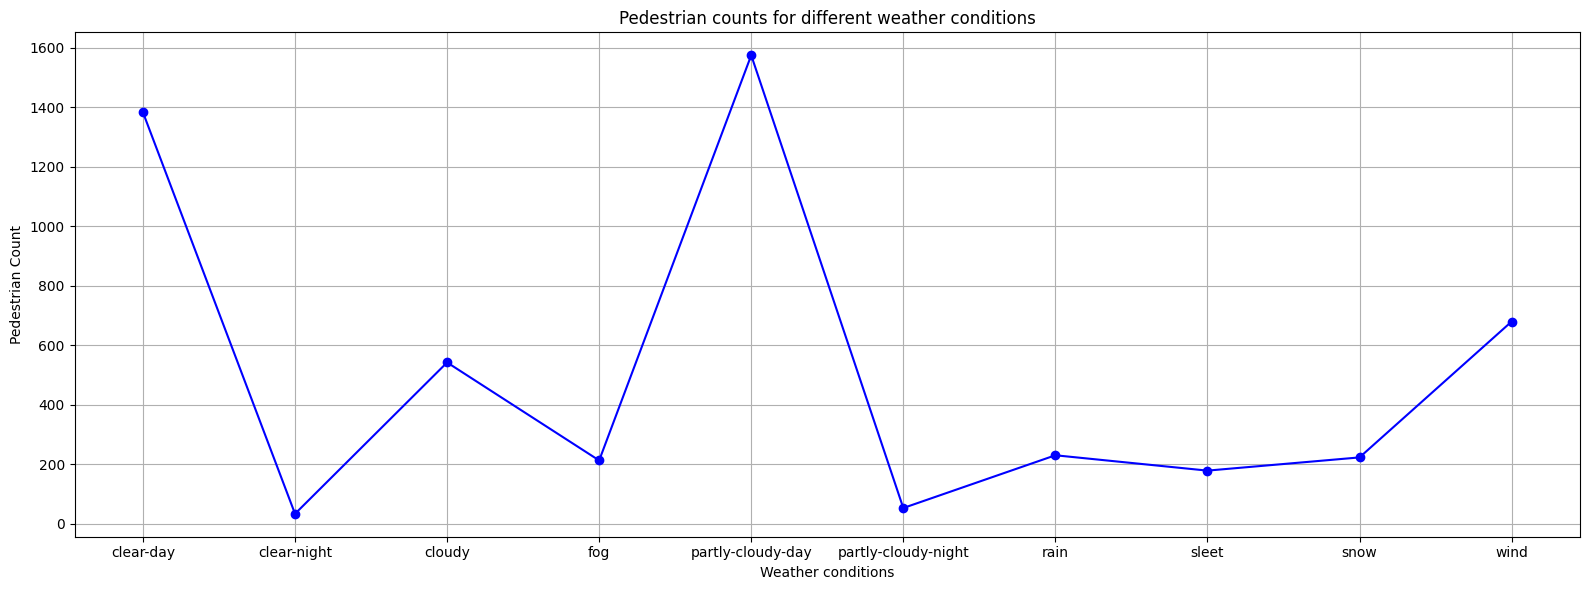

In [41]:
# Filter the data for 2019
df_2019 = df[df['hour_beginning'].dt.year == 2019].copy()

# Arranging data in chronological order first and then proceeding to forward/back fill
df_2019 = df_2019.sort_values(by='hour_beginning')
df_2019.reset_index(drop=True, inplace=True)
df_2019['weather_summary'] = df_2019['weather_summary'].fillna(method="ffill")

# Aggregation
df_2019_grouped = df_2019.groupby('weather_summary')['Pedestrians'].mean()

# Plotting a line plot of pedestrian counts for different weather conditions
plt.figure(figsize=(16, 6))
plt.plot(df_2019_grouped.index, df_2019_grouped.values, marker = 'o', color='blue')
plt.title('Pedestrian counts for different weather conditions')
plt.xlabel('Weather conditions')
plt.ylabel('Pedestrian Count')
plt.grid(True)
plt.tight_layout()
plt.show()

By looking at the mean pedestrian for different weather conditions, we can summarize as following:

(1) There is much less pedestrian at night;

(2) Cloud and wind have relatively low influence on the pedestrian counts;

(3) Fog, rain, sleet and snow have strong influence on the pedestrian counts.

In [50]:
# Keep only weather_summary and Pedestrian
df_2019_subset = df_2019[['Pedestrians', 'weather_summary']].copy()

# Use dummy variable since weather_summary contains strings
weather_dummies = pd.get_dummies(df_2019_subset['weather_summary'], prefix='weather')

# Creating a correlation matrix
df_2019_corr = pd.concat([df_2019_subset['Pedestrians'], weather_dummies], axis=1)
correlation_matrix = df_2019_corr.corr()

# Sort the pedestrian counts by weather conditions
df_2019_corr_sorted = correlation_matrix['Pedestrians'].sort_values(ascending=False)
print(df_2019_corr_sorted)

Pedestrians                    1.000000
weather_partly-cloudy-day      0.497867
weather_clear-day              0.339758
weather_wind                  -0.000170
weather_sleet                 -0.017091
weather_fog                   -0.026457
weather_snow                  -0.034052
weather_cloudy                -0.082244
weather_rain                  -0.138581
weather_partly-cloudy-night   -0.282698
weather_clear-night           -0.377989
Name: Pedestrians, dtype: float64


3. Implement a custom function to categorize time of day into morning, afternoon, evening, and night, and create a new column in the DataFrame to store these categories. Use this new column to analyze pedestrian activity patterns throughout the day.

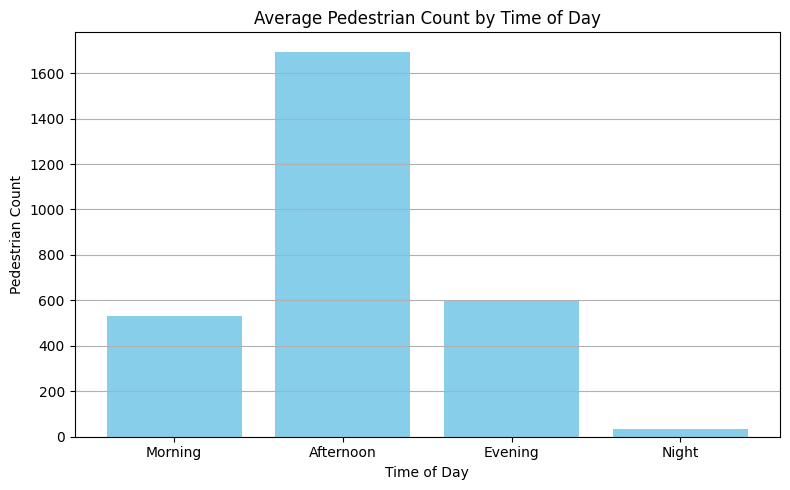

In [51]:
# Define the function
def categorize_time_of_day(dt):
    hour = dt.hour
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 22:
        return 'Evening'
    else:
        return 'Night'

# Create a new column to store the category
df['time_of_day'] = df['hour_beginning'].apply(categorize_time_of_day)

# Rearrange the data
time_activity = df.groupby('time_of_day')['Pedestrians'].mean()
order = ['Morning', 'Afternoon', 'Evening', 'Night']
time_activity = time_activity.reindex(order)

# Plot a bar graph
plt.figure(figsize=(8, 5))
plt.bar(time_activity.index, time_activity.values, color='skyblue')
plt.title('Average Pedestrian Count by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Pedestrian Count')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

It is easy to see that most people cross the Brooklyn Bridge in the afternoon, a small part of pedestrians cross in the morning and evening, and only a very few cross at night.